Consider how to make a more stable biological age model – we would like to leave in a cardiovascular component – but could use other features to help stabilize it.  If none of the above will be useful we can look at other possibilities.  Feature definitions included in the attached excel file if helpful.

*Try different combinations of different features to see which choices has the most stable (minimum avg range & avg std), be sure to include cardiac workload and vascular capacity

When you say 'model' do you mean the formula with different weights assigned to different variables or a real regression model? 

Potential Combinations: **Record the results
Y: BioAge
X:
Cardiac workload (BP_RPP) or Vascular capacity (BP_TAU) or both (others also)
Maybe + : 
○ AGE_PHYSIOLOGICAL
○ Age_dermatological
○ Age_skin


In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv("Phase3b-V1-HYD.csv")
df.head()

,Age,Height,Gender,Race,Ethnicity,ABSI,AGE_DERMATOLOGICAL,AGE_PHYSIOLOGICAL,BMI_CALC,BP_CVD,...,OVERALL_METABOLIC_RISK_PROB,PHYSICAL_SCORE,PHYSIO_SCORE,RISKS_SCORE,STRESS_SCORE,TG_RISK_PROB,VITAL_SCORE,WAIST_CIRCUM,WAIST_TO_HEIGHT,BioAge
0,36,170,1,Asian,Not Hispanic or Latino,7.819081,47.724342,41.152167,24.809689,0.743641,...,21.275154,4.333333,4.5,4.428571,0.566639,44.913422,4.50,86.721683,51.012755,24.308602
1,36,170,1,Asian,Not Hispanic or Latino,7.819081,63.511997,44.520247,24.809689,0.862492,...,20.985216,4.333333,4.5,4.428571,0.543176,34.938101,3.75,86.721683,51.012755,25.140573
2,36,170,1,Asian,Not Hispanic or Latino,7.819081,52.182560,43.553174,24.809689,0.760659,...,26.243225,4.333333,4.0,4.142857,0.523569,60.442266,4.00,86.721683,51.012755,20.214462
3,41,185,1,White,Not Hispanic or Latino,8.000589,52.561851,41.248420,30.474799,3.064271,...,55.542359,2.666667,3.5,3.285714,0.326078,76.302478,3.50,106.169972,57.389174,28.583772
4,41,185,1,White,Not Hispanic or Latino,8.000589,61.557029,40.560317,30.474799,3.316405,...,52.293633,2.666667,3.5,3.428571,0.324753,80.769601,4.25,106.169972,57.389174,32.274959


In [3]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
print("Categorical columns:", categorical_columns.tolist())
df = df.drop(columns=['Race','Ethnicity','BioAge'])

Categorical columns: ['Race', 'Ethnicity']


### BA Equation - MLR with all features included

In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, LassoCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

X = df.drop(columns=['Age','HEALTH_SCORE'])
y = df['Age']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
test_index = X_test.index

In [19]:
X.shape
print(X.columns) # 42

Index(['Height', 'Gender', 'ABSI', 'AGE_DERMATOLOGICAL', 'AGE_PHYSIOLOGICAL',
       'BMI_CALC', 'BP_CVD', 'BP_DIASTOLIC', 'BP_HEART_ATTACK', 'BP_MAP',
       'BP_PP', 'BP_RPP', 'BP_STROKE', 'BP_SYSTOLIC', 'BP_TAU', 'BR_BPM',
       'BR_HERTZ', 'DBT_RISK_PROB', 'FLD_RISK_PROB', 'HBA1C_RISK_PROB',
       'HDLTC_RISK_PROB', 'HPT_RISK_PROB', 'HR_BPM', 'HR_HERTZ', 'HR180_BPM',
       'HR180_HERTZ', 'HRV_ALPHA1', 'HRV_SD1', 'HRV_SD1_DIV_SD2', 'HRV_SD2',
       'MENTAL_SCORE', 'MFBG_RISK_PROB', 'MSI', 'OVERALL_METABOLIC_RISK_PROB',
       'PHYSICAL_SCORE', 'PHYSIO_SCORE', 'RISKS_SCORE', 'STRESS_SCORE',
       'TG_RISK_PROB', 'VITAL_SCORE', 'WAIST_CIRCUM', 'WAIST_TO_HEIGHT'],
      dtype='object')


In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pickle

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and fit the Linear Regression model
model = LinearRegression(fit_intercept=True)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
r2 = r2_score(y_test, y_pred)  # R-squared value

# Output the results
print("Model Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

# Compare y_pred with HEALTH_SCORE as a validation step
health_score_test = df.loc[test_index, 'HEALTH_SCORE']
correlation = np.corrcoef(y_pred, health_score_test)[0, 1]  # Example correlation analysis
print(f"Correlation with HEALTH_SCORE: {correlation:.2f}")

with open('mlr_model.pkl', 'wb') as mlr_file:
    pickle.dump(model, mlr_file)

Model Coefficients: [ 3.47271687e+00 -2.29525852e+00  6.43031909e+00  5.15967056e-02
 -2.24055228e-01  9.17113631e-01  2.30290120e+00  7.51221435e+06
  8.66570644e-01 -8.15665399e+06  2.97204760e+06  3.24674625e+00
 -6.38319331e-01 -7.69003511e+05  2.12429367e-01 -1.45962024e+07
  1.45962024e+07  3.45066343e+01  4.36539390e+01  8.10087502e+00
  4.01867248e+01  4.49081792e+01  1.54442853e+08 -1.54442857e+08
 -1.36598779e+08  1.36598780e+08 -1.60998883e-02 -2.68606246e-01
  1.80091624e-01  1.96806072e-01  3.43255519e-01  3.34462845e-01
  4.64592542e-01 -1.62359966e+02  2.75071618e+00  1.21843366e-01
  6.11522273e+00 -3.39561679e-01  3.68562711e+01  5.93980356e-01
 -1.64926653e+01  1.04460590e+01]
Intercept: 38.448709450936946
Mean Squared Error: 16.70
R-squared: 0.92
Correlation with HEALTH_SCORE: -0.59


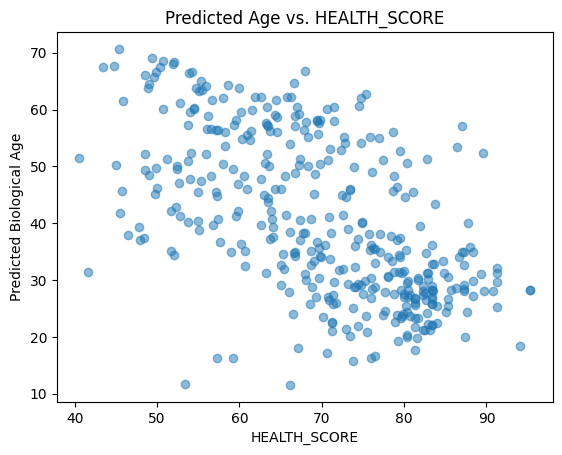

In [ ]:
import matplotlib.pyplot as plt

health_score_test = df.loc[test_index, 'HEALTH_SCORE']
plt.scatter(health_score_test, y_pred, alpha=0.5)
plt.xlabel("HEALTH_SCORE")
plt.ylabel("Predicted Biological Age")
plt.title("Predicted Age vs. HEALTH_SCORE")
plt.show()

### PCA
1. Filter Features Based on Correlation
- Compute the correlation matrix.
- Drop features with weak correlation (absolute value below a threshold, e.g., 0.1) with the target variable.
2. Remove Redundant Features
- Identify highly correlated features (pairwise correlation above a threshold, e.g., 0.9) and keep only one feature from each pair.
3. Use Eigenvalues for Dimensionality Reduction
- Perform Principal Component Analysis (PCA) and retain components with eigenvalues > 1.

In [25]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# include HEALTH_SCORE
# Step 1: Correlation with the target variable
correlation_threshold = 0.1
correlation_matrix = df.corr()
target_corr = correlation_matrix['Age'].drop('Age')
selected_features = target_corr[abs(target_corr) > correlation_threshold].index
print(selected_features)
print(len(selected_features))
# Subset dataframe with selected features
df_subset = df[selected_features]

Index(['Height', 'Gender', 'ABSI', 'AGE_DERMATOLOGICAL', 'AGE_PHYSIOLOGICAL',
       'BMI_CALC', 'BP_CVD', 'BP_DIASTOLIC', 'BP_HEART_ATTACK', 'BP_MAP',
       'BP_PP', 'BP_RPP', 'BP_STROKE', 'BP_SYSTOLIC', 'BP_TAU',
       'DBT_RISK_PROB', 'FLD_RISK_PROB', 'HBA1C_RISK_PROB', 'HDLTC_RISK_PROB',
       'HEALTH_SCORE', 'HPT_RISK_PROB', 'HRV_ALPHA1', 'HRV_SD1',
       'HRV_SD1_DIV_SD2', 'HRV_SD2', 'MENTAL_SCORE', 'MFBG_RISK_PROB', 'MSI',
       'OVERALL_METABOLIC_RISK_PROB', 'PHYSICAL_SCORE', 'PHYSIO_SCORE',
       'RISKS_SCORE', 'STRESS_SCORE', 'TG_RISK_PROB', 'VITAL_SCORE',
       'WAIST_CIRCUM', 'WAIST_TO_HEIGHT'],
      dtype='object')
37


In [30]:
# Step 2: Remove redundant features (pairwise correlation) - no multicollinearity
redundancy_threshold = 0.9
correlation_matrix_subset = df_subset.corr()
redundant_features = set()

for i in range(len(correlation_matrix_subset.columns)):
    for j in range(i):
        if abs(correlation_matrix_subset.iloc[i, j]) > redundancy_threshold:
            redundant_features.add(correlation_matrix_subset.columns[i])

print(redundant_features)
print(len(redundant_features))
df_non_redundant = df_subset.drop(columns=redundant_features)
print(len(df_non_redundant.columns))
df_non_redundant.columns

{'VITAL_SCORE', 'MSI', 'BP_SYSTOLIC', 'WAIST_TO_HEIGHT', 'WAIST_CIRCUM', 'BP_MAP', 'OVERALL_METABOLIC_RISK_PROB', 'RISKS_SCORE'}
8
29


Index(['Height', 'Gender', 'ABSI', 'AGE_DERMATOLOGICAL', 'AGE_PHYSIOLOGICAL',
       'BMI_CALC', 'BP_CVD', 'BP_DIASTOLIC', 'BP_HEART_ATTACK', 'BP_PP',
       'BP_RPP', 'BP_STROKE', 'BP_TAU', 'DBT_RISK_PROB', 'FLD_RISK_PROB',
       'HBA1C_RISK_PROB', 'HDLTC_RISK_PROB', 'HEALTH_SCORE', 'HPT_RISK_PROB',
       'HRV_ALPHA1', 'HRV_SD1', 'HRV_SD1_DIV_SD2', 'HRV_SD2', 'MENTAL_SCORE',
       'MFBG_RISK_PROB', 'PHYSICAL_SCORE', 'PHYSIO_SCORE', 'STRESS_SCORE',
       'TG_RISK_PROB'],
      dtype='object')

In [36]:
# Step 3: Use PCA for dimensionality reduction
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_non_redundant)

pca = PCA()
pca.fit(X_scaled)

# Retain components with eigenvalues > 1
eigenvalues = pca.explained_variance_
components_to_keep = np.sum(eigenvalues > 1)
print(components_to_keep)
pca = PCA(n_components=components_to_keep)
X_pca = pca.fit_transform(X_scaled)

7


In [ ]:
# Get loadings (coefficients for each biomarker)
loadings = pca.components_
import pandas as pd

feature_names = df_non_redundant.columns  # Original feature names
loadings_df = pd.DataFrame(loadings.T, columns=[f"PC{i+1}" for i in range(components_to_keep)], index=feature_names)
print(loadings_df)

most_influential_features = loadings_df.abs().idxmax(axis=0)
print("Most influential features for each PC:")
print(most_influential_features)

                         PC1       PC2       PC3       PC4       PC5  \
Height              0.002845  0.154479  0.433065 -0.184579  0.239225   
Gender             -0.009019  0.173595  0.485378 -0.151700  0.224296   
ABSI               -0.187727  0.088371  0.006607 -0.193160  0.237220   
AGE_DERMATOLOGICAL -0.066722 -0.008513 -0.077051 -0.136760  0.065675   
AGE_PHYSIOLOGICAL  -0.176459 -0.000359 -0.247248 -0.215611  0.104152   
BMI_CALC           -0.190827  0.171609 -0.031642  0.362037 -0.191145   
BP_CVD             -0.214530  0.130335 -0.140968 -0.060264 -0.037864   
BP_DIASTOLIC       -0.222822  0.131027  0.113695  0.161074 -0.028572   
BP_HEART_ATTACK    -0.172231  0.107854 -0.187445  0.140935 -0.175544   
BP_PP              -0.177074  0.012632 -0.133682 -0.376018  0.016742   
BP_RPP             -0.196009 -0.108343  0.117850 -0.037987 -0.247110   
BP_STROKE          -0.191883  0.119961 -0.042817 -0.246756  0.108450   
BP_TAU              0.103433  0.193014  0.031381  0.377493  0.20

In [39]:
len(loadings)

7

In [40]:
# Step 4: Construct the BAS for the first principal component
# Calculate feature-specific means and standard deviations
means = df_non_redundant.mean(axis=0)  # Mean for each feature
std_devs = df_non_redundant.std(axis=0)  # Standard deviation for each feature

# Using the first row of `loadings` (for PC1)
coefficients = loadings[0]  # Coefficients for PC1
# Standardized biomarkers
standardized_features = (df_non_redundant - means) / std_devs
# BAS calculation
BAS = standardized_features.dot(coefficients)
print(BAS)
# Add BAS to the DataFrame
#df["BAS"] = BAS
# Save the results
#df.to_csv("bas_results.csv", index=False)

0       3.531042
1       3.288598
2       2.713167
3      -1.507614
4      -1.163645
          ...   
1884    0.075446
1885   -0.050667
1886    0.213774
1887   -2.652194
1888   -0.346702
Length: 1889, dtype: float64


In [64]:
# Calculate standard deviation and mean of Chronological Age (CA)
SD_CA = df['Age'].std()
MEAN_CA = df['Age'].mean()

# Recalculate BA for the entire dataset
BA = BAS * SD_CA + MEAN_CA
print(BA)

0       89.525501
1       86.046247
2       77.788361
3       17.216869
4       22.153098
          ...    
1884    39.935010
1885    38.125190
1886    41.920120
1887     0.791254
1888    33.876858
Length: 1889, dtype: float64


In [69]:
# Perform linear regression to find slope `b`
from sklearn.linear_model import LinearRegression
model = LinearRegression()
CA = df['Age']
BA_reshaped = pd.DataFrame(BA)
CA = df['Age'].values.reshape(-1, 1)
model.fit(CA, BA_reshaped)
b = model.coef_[0][0]
print("Slope b:", b)

Slope b: -2.3855130388591186


In [66]:
# Calculate Z for correction
Z = (CA - MEAN_CA) * (1 - b)
Z = Z.sum(axis=1)  # Sum along rows if applicable
print(Z)
# Final corrected BA
Corrected_BA = BA + Z
# Output results
print("Corrected BA:", Corrected_BA)

[-3.32656334 -3.32656334 -3.32656334 ...  3.6710738   3.6710738
  3.6710738 ]
Corrected BA: 0       86.198938
1       82.719683
2       74.461798
3       19.721670
4       24.657899
          ...    
1884    36.608447
1885    34.798627
1886    45.591194
1887     4.462328
1888    37.547932
Length: 1889, dtype: float64


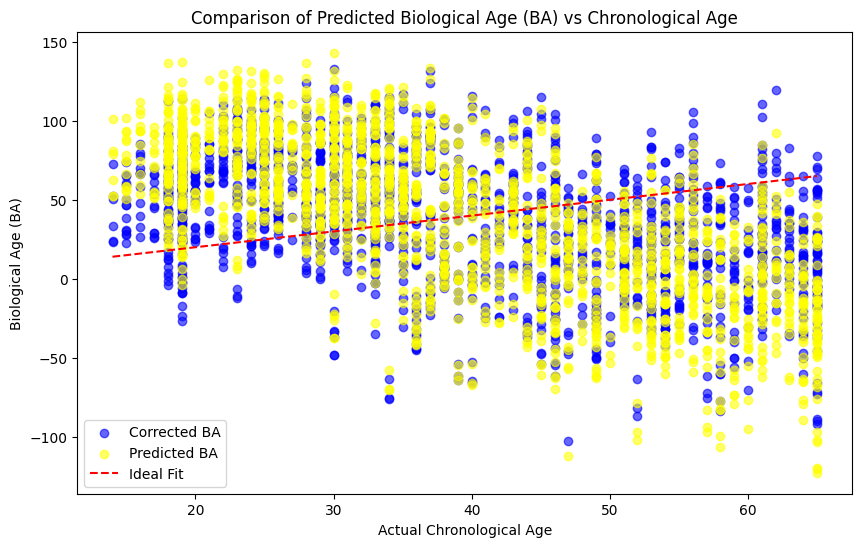

In [67]:
import matplotlib.pyplot as plt

# Plot comparison of actual vs predicted age
plt.figure(figsize=(10,6))

# Plot Actual Age vs Predicted Biological Age (BA)
plt.scatter(df['Age'], Corrected_BA, color='blue', label='Corrected BA', alpha=0.6)
plt.scatter(df['Age'], BA, color='yellow', label='Predicted BA', alpha=0.6)
plt.plot([df['Age'].min(), df['Age'].max()], [df['Age'].min(), df['Age'].max()], color='red', linestyle='--', label='Ideal Fit')

# Labels and title
plt.xlabel('Actual Chronological Age')
plt.ylabel('Biological Age (BA)')
plt.title('Comparison of Predicted Biological Age (BA) vs Chronological Age')

# Show legend
plt.legend()

# Show plot
plt.show()

### biological age score (BAS) equation - w/o PCA
BAS represents the physiological function of an individual. In other words, BAS is the standardized BA.

In [26]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_non_redundant)
# Prepare the target variable and split the data
X = pd.DataFrame(X_scaled,columns=[['Height', 'Gender', 'ABSI', 'AGE_DERMATOLOGICAL', 'AGE_PHYSIOLOGICAL',
       'BMI_CALC', 'BP_CVD', 'BP_DIASTOLIC', 'BP_HEART_ATTACK', 'BP_PP',
       'BP_RPP', 'BP_STROKE', 'BP_TAU', 'DBT_RISK_PROB', 'FLD_RISK_PROB',
       'HBA1C_RISK_PROB', 'HDLTC_RISK_PROB', 'HEALTH_SCORE', 'HPT_RISK_PROB',
       'HRV_ALPHA1', 'HRV_SD1', 'HRV_SD1_DIV_SD2', 'HRV_SD2', 'MENTAL_SCORE',
       'MFBG_RISK_PROB', 'PHYSICAL_SCORE', 'PHYSIO_SCORE', 'STRESS_SCORE',
       'TG_RISK_PROB']])
y = df['Age']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression model
model = LinearRegression(fit_intercept=True)
model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Output results
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 21.159137996317103
R-squared: 0.8964131393847901


In [31]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Forward stepwise selection
def forward_selection(X, y, significance_level=0.05):
    remaining_features = list(X.columns)
    selected_features = []
    current_score, best_new_score = float('inf'), float('inf')

    while remaining_features:
        scores_with_candidates = []
        for candidate in remaining_features:
            features_to_test = selected_features + [candidate]
            X_test = sm.add_constant(X[features_to_test])
            model = sm.OLS(y, X_test).fit()
            score = model.aic  # Akaike Information Criterion (lower is better)
            scores_with_candidates.append((score, candidate))

        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates[0]

        if current_score > best_new_score:
            remaining_features.remove(best_candidate)
            selected_features.append(best_candidate)
            current_score = best_new_score
        else:
            break

    return selected_features

# Run forward selection
forward_features = forward_selection(X_train, y_train)

# Subset the data with selected features
X_train_selected = X_train[forward_features]
X_test_selected = X_test[forward_features]

# Fit Linear Regression with selected features
model = LinearRegression(fit_intercept=True)
model.fit(X_train_selected, y_train)

# Evaluate the model
y_pred = model.predict(X_test_selected)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Output results
print("Forward Selected Features:", forward_features)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Forward Selected Features: [('HBA1C_RISK_PROB',), ('BMI_CALC',), ('HPT_RISK_PROB',), ('Gender',), ('ABSI',), ('PHYSICAL_SCORE',), ('BP_CVD',), ('BP_STROKE',), ('Height',), ('TG_RISK_PROB',), ('BP_RPP',), ('FLD_RISK_PROB',), ('BP_HEART_ATTACK',), ('STRESS_SCORE',), ('BP_DIASTOLIC',), ('HEALTH_SCORE',), ('BP_PP',), ('MENTAL_SCORE',), ('PHYSIO_SCORE',), ('DBT_RISK_PROB',), ('HRV_SD1',), ('HRV_ALPHA1',)]
Mean Squared Error: 21.208369310702885
R-squared: 0.8961721221324771


In [41]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Backward elimination function
def backward_elimination(X, y, significance_level=0.05):
    features = list(X.columns)
    while len(features) > 0:
        X_train = sm.add_constant(X[features])
        model = sm.OLS(y, X_train).fit()
        p_values = model.pvalues[1:]  # Ignore the intercept's p-value
        max_p_value = p_values.max()  # Find the feature with the highest p-value

        if max_p_value > significance_level:
            excluded_feature = p_values.idxmax()
            features.remove(excluded_feature)
        else:
            break

    return features

# Run backward elimination
backward_features = backward_elimination(X_train, y_train)

# Subset the data with selected features
X_train_selected = X_train[backward_features]
X_test_selected = X_test[backward_features]

# Fit Linear Regression with selected features
model = LinearRegression(fit_intercept=True)
model.fit(X_train_selected, y_train)

# Evaluate the model
y_pred = model.predict(X_test_selected)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Output results
print("Backward Selected Features:", backward_features)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Backward Selected Features: [0, 2, 3, 4, 5, 6]
Mean Squared Error: 46.92864775211936
R-squared: 0.7702557025524766


In [33]:
print(len(df_non_redundant.columns))
print(len(forward_selection(X_train, y_train)))
print(len(backward_elimination(X_train, y_train)))

common_features = set(forward_features) & set(backward_features)
print("Common Features:", common_features)

29
22
20
Common Features: {('MENTAL_SCORE',), ('FLD_RISK_PROB',), ('DBT_RISK_PROB',), ('HPT_RISK_PROB',), ('BP_RPP',), ('PHYSIO_SCORE',), ('BP_DIASTOLIC',), ('BMI_CALC',), ('BP_CVD',), ('ABSI',), ('HEALTH_SCORE',), ('BP_HEART_ATTACK',), ('Gender',), ('STRESS_SCORE',), ('HBA1C_RISK_PROB',), ('TG_RISK_PROB',), ('Height',), ('HRV_SD1',), ('BP_STROKE',), ('BP_PP',)}


### w/ PCA
Cite: https://www.sciencedirect.com/science/article/pii/S1279770723016925?via%3Dihub

In [79]:
# Prepare the target variable and split the data
X = pd.DataFrame(X_pca)
y = df['Age']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression model
model_bas = LinearRegression(fit_intercept=True)
model_bas.fit(X_train, y_train)

# Predictions and evaluation
y_pred_bas = model_bas.predict(X_test)
mse = mean_squared_error(y_test, y_pred_bas)
r2 = r2_score(y_test, y_pred_bas)

# Output results
print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("PCA Components Retained:", components_to_keep)

Mean Squared Error: 46.91439530944577
R-squared: 0.7703254769352
PCA Components Retained: 7


In [80]:
# Predict y_pred_bas for the entire dataset using the trained model
y_pred_bas_full = model_bas.predict(X)
print(y_pred_bas_full)

# Calculate standard deviation and mean of Chronological Age (CA)
SD_CA = df['Age'].std()
MEAN_CA = df['Age'].mean()

# Recalculate BA for the entire dataset
#BA_full = y_pred_bas_full * SD_CA + MEAN_CA
#print(BA_full)

# Reshape to match dimensions
BA_reshaped = y_pred_bas_full.reshape(-1, 1)
CA = df['Age'].values.reshape(-1, 1)

# Verify shapes
print("CA shape:", CA.shape)
print("BA_reshaped shape:", BA_reshaped.shape)

# Perform linear regression to find slope `b`
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(CA, BA_reshaped)
b = model.coef_[0][0]
print("Slope b:", b)

# Calculate Z for correction
Z = (CA - MEAN_CA) * (1 - b)
print(Z)
# Final corrected BA
Corrected_BA = BA_reshaped + Z

# Output results
print("Corrected BA:", Corrected_BA)

[31.98591927 33.90488023 35.74936998 ... 32.75379113 46.92586938
 33.95628307]
CA shape: (1889, 1)
BA_reshaped shape: (1889, 1)
Slope b: 0.8226619314902973
[[-0.50582187]
 [-0.50582187]
 [-0.50582187]
 ...
 [ 0.55820654]
 [ 0.55820654]
 [ 0.55820654]]
Corrected BA: [[31.4800974 ]
 [33.39905836]
 [35.24354811]
 ...
 [33.31199767]
 [47.48407592]
 [34.51448961]]


array([[<Axes: title={'center': '0'}>]], dtype=object)

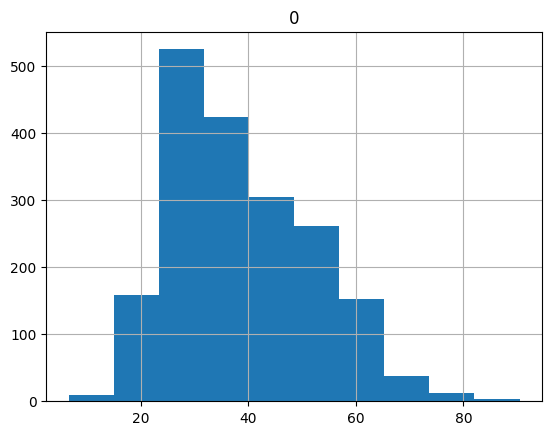

In [58]:
pd.DataFrame(y_pred_bas_full).hist()

<Axes: >

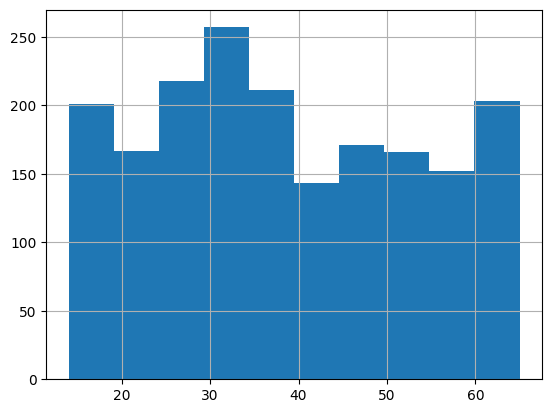

In [59]:
y.hist()

In [51]:
SD_CA

np.float64(14.35077716851821)

In [52]:
MEAN_CA

np.float64(38.85230280571731)

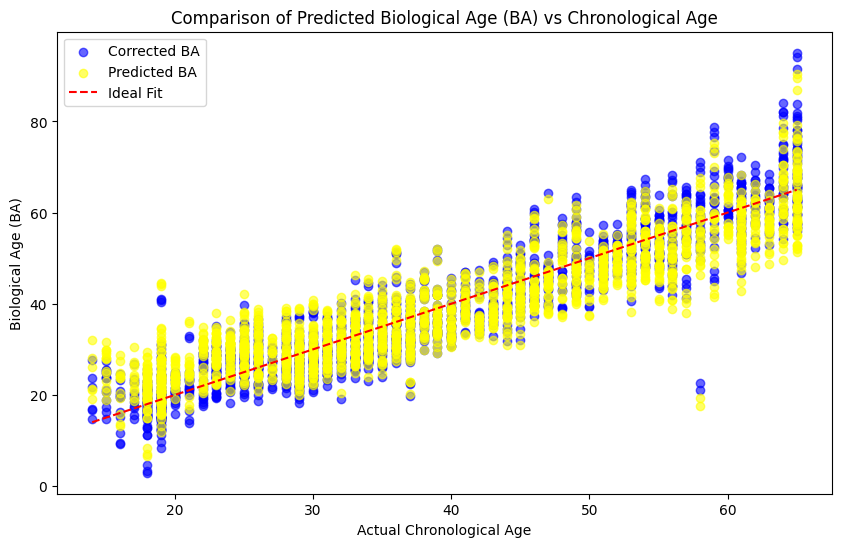

In [81]:
import matplotlib.pyplot as plt

# Plot comparison of actual vs predicted age
plt.figure(figsize=(10,6))

# Plot Actual Age vs Predicted Biological Age (BA)
plt.scatter(df['Age'], Corrected_BA, color='blue', label='Corrected BA', alpha=0.6)
plt.scatter(df['Age'], BA_reshaped, color='yellow', label='Predicted BA', alpha=0.6)
plt.plot([df['Age'].min(), df['Age'].max()], [df['Age'].min(), df['Age'].max()], color='red', linestyle='--', label='Ideal Fit')

# Labels and title
plt.xlabel('Actual Chronological Age')
plt.ylabel('Biological Age (BA)')
plt.title('Comparison of Predicted Biological Age (BA) vs Chronological Age')

# Show legend
plt.legend()

# Show plot
plt.show()

In [77]:
import pickle

# Print the original features used by the PCA model
print("Original features used before PCA:", df_non_redundant.columns)

# Print the loadings of the principal components
print("PCA Loadings (Component coefficients relative to original features):")
print(pca.components_)

# Access the model's coefficients for linear regression
print("Linear Regression Coefficients (for the principal components):")
print(model_bas.coef_)

import joblib
# Save StandardScaler
joblib.dump(scaler, 'scaler.pkl')

with open('pca_model.pkl', 'wb') as pca_file:
    pickle.dump(pca, pca_file)

with open('model_bas.pkl', 'wb') as lr_file:
    pickle.dump(model_bas, lr_file)

# Save feature names
feature_names = list(df_non_redundant.columns)  # Original dataset columns excluding Age
joblib.dump(feature_names, 'feature_names.pkl')

Original features used before PCA: Index(['Height', 'Gender', 'ABSI', 'AGE_DERMATOLOGICAL', 'AGE_PHYSIOLOGICAL',
       'BMI_CALC', 'BP_CVD', 'BP_DIASTOLIC', 'BP_HEART_ATTACK', 'BP_PP',
       'BP_RPP', 'BP_STROKE', 'BP_TAU', 'DBT_RISK_PROB', 'FLD_RISK_PROB',
       'HBA1C_RISK_PROB', 'HDLTC_RISK_PROB', 'HEALTH_SCORE', 'HPT_RISK_PROB',
       'HRV_ALPHA1', 'HRV_SD1', 'HRV_SD1_DIV_SD2', 'HRV_SD2', 'MENTAL_SCORE',
       'MFBG_RISK_PROB', 'PHYSICAL_SCORE', 'PHYSIO_SCORE', 'STRESS_SCORE',
       'TG_RISK_PROB'],
      dtype='object')
PCA Loadings (Component coefficients relative to original features):
[[ 2.84540450e-03 -9.01889508e-03 -1.87727378e-01 -6.67217221e-02
  -1.76458519e-01 -1.90827085e-01 -2.14530300e-01 -2.22821515e-01
  -1.72231255e-01 -1.77074302e-01 -1.96009371e-01 -1.91882610e-01
   1.03432562e-01 -2.49236771e-01 -2.44194656e-01 -2.52707395e-01
  -2.15022611e-01  2.83698512e-01 -2.52805429e-01  5.50942678e-02
   1.23367716e-01 -6.23398894e-02  1.37658929e-01  1.27997590e-0

['feature_names.pkl']

In [ ]:
# Load the PCA model
with open('pca_model.pkl', 'rb') as pca_file:
    pca = pickle.load(pca_file)

# Load the Linear Regression model
with open('lr_model.pkl', 'rb') as lr_file:
    model_bas = pickle.load(lr_file)